#Projeto

##Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
import scipy.stats as ss
from scipy.stats import ttest_ind, randint, uniform
import shap
import pickle
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

Este bloco configura todo o ambiente, garantindo que todas as bibliotecas necessárias estejam disponíveis e que os gráficos sigam um estilo padronizado.


##Carregamento do Dataset

In [2]:
df = pd.read_csv("teste_indicium_precificacao.csv")

print("Dimensões do dataset:", df.shape)
df.head()

Dimensões do dataset: (29216, 16)


,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,2019-06-22,0.59,1.0,129.0


##Verificação de Valores Ausentes e Duplicatas

In [3]:
df.info()
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             29216 non-null  int64  
 1   nome                           29200 non-null  object 
 2   host_id                        29216 non-null  int64  
 3   host_name                      29198 non-null  object 
 4   bairro_group                   29216 non-null  object 
 5   bairro                         29216 non-null  object 
 6   latitude                       29216 non-null  float64
 7   longitude                      29216 non-null  float64
 8   room_type                      29216 non-null  object 
 9   price                          29215 non-null  float64
 10  minimo_noites                  29215 non-null  float64
 11  numero_de_reviews              29215 non-null  float64
 12  ultima_review                  24385 non-null 

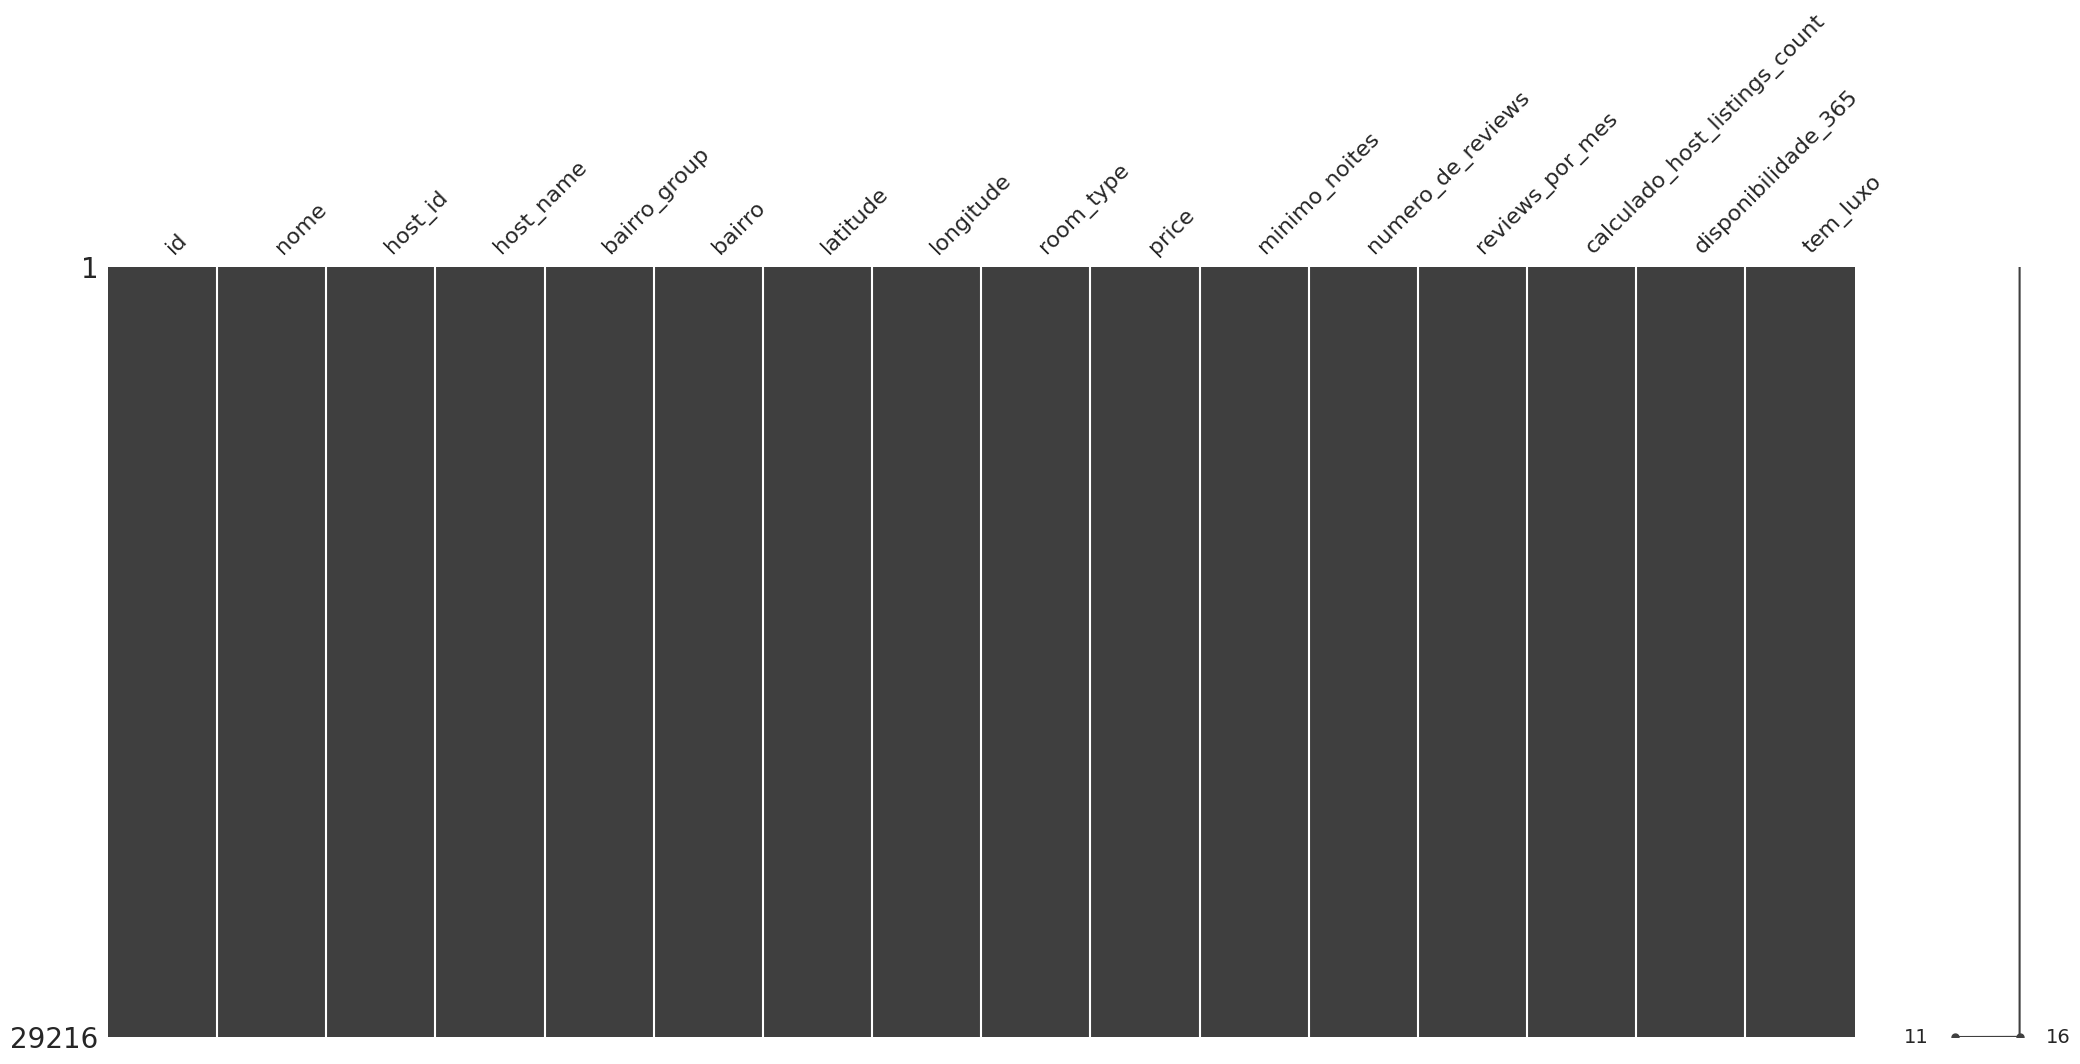

In [28]:
msno.matrix(df)
plt.show()

In [5]:
duplicados = df.duplicated().sum()
print("Número de duplicatas:", duplicados)

Número de duplicatas: 0


###Tratamento de Valores Ausentes e Duplicatas

In [6]:
#df = df.drop_duplicates()
df['nome'] = df['nome'].fillna("Sem Nome")
df['host_name'] = df['host_name'].fillna("Sem Nome")
df = df.drop(columns=['ultima_review'])
df['reviews_por_mes'] = df['reviews_por_mes'].fillna(0)

In [7]:
df.describe(include='all')

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,2.921600e+04,29216,2.921600e+04,29216,29216,29216,29216.000000,29216.000000,29216,29215.000000,29215.000000,29215.000000,29216.000000,29215.000000,29215.000000
unique,NaN,28749,NaN,7968,5,215,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,18,NaN,267,13076,2591,NaN,NaN,15592,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.142097e+07,NaN,3.418744e+07,NaN,NaN,NaN,40.729142,-73.954661,NaN,148.241349,7.061201,32.491015,0.850822,3.542221,99.227965
std,6.885306e+06,NaN,4.007351e+07,NaN,NaN,NaN,0.053701,0.041844,NaN,226.242573,22.483755,54.190470,1.324373,12.106279,130.102859
min,2.595000e+03,NaN,2.571000e+03,NaN,NaN,NaN,40.499790,-74.242850,NaN,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,5.373602e+06,NaN,4.844085e+06,NaN,NaN,NaN,40.689360,-73.982620,NaN,70.000000,2.000000,1.000000,0.050000,1.000000,0.000000
50%,1.153227e+07,NaN,1.813912e+07,NaN,NaN,NaN,40.722750,-73.956740,NaN,109.000000,3.000000,8.000000,0.250000,1.000000,8.000000
75%,1.761893e+07,NaN,4.805692e+07,NaN,NaN,NaN,40.763843,-73.939867,NaN,174.000000,5.000000,40.000000,1.110000,2.000000,201.000000


##Análise exploratória de dados

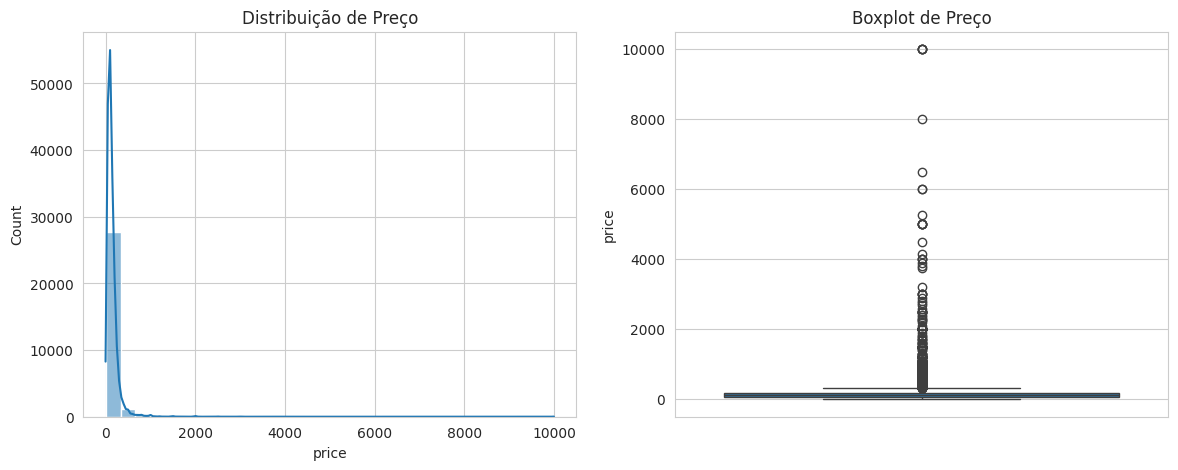

In [8]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

sns.histplot(df['price'], bins=30, kde=True, ax=ax[0])
ax[0].set_title("Distribuição de Preço")

sns.boxplot(y=df['price'], ax=ax[1])
ax[1].set_title("Boxplot de Preço")

plt.show()

Aqui podemos ver a distribuição dos preços e valores outlines que podem prejudicar os modelos. Com essa analise percebemos que os valores se concentram entre 0 a 1000.

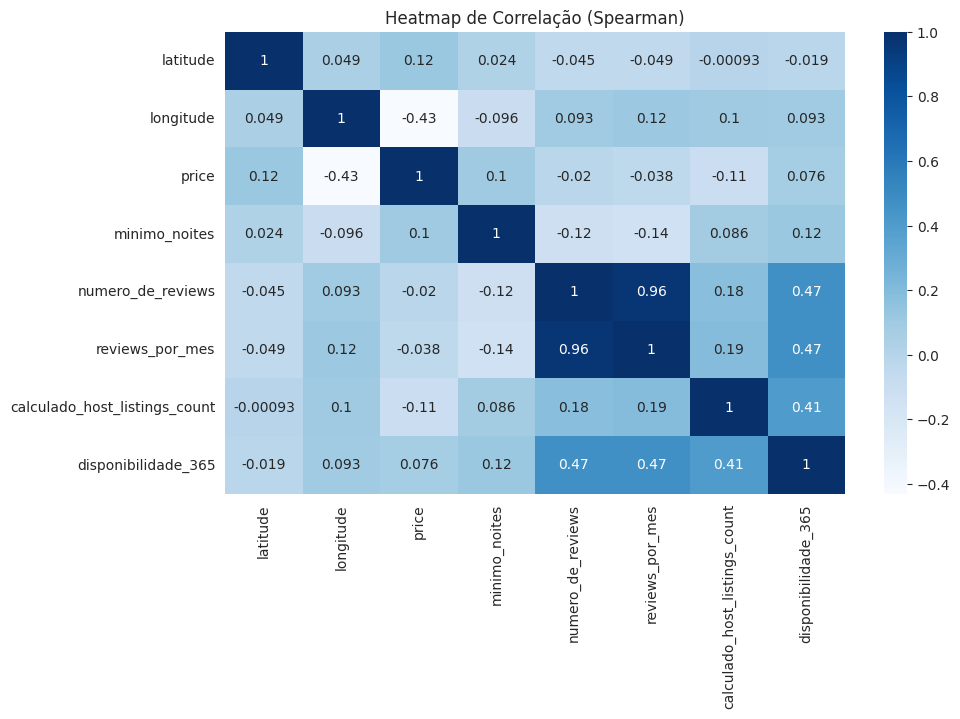

In [29]:
num_cols = ['latitude','longitude','price','minimo_noites','numero_de_reviews',
            'reviews_por_mes','calculado_host_listings_count','disponibilidade_365']

corr = df[num_cols].corr(method='spearman')  # Spearman para não-linear
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Heatmap de Correlação (Spearman)")
plt.show()

Com base no heatmap, podemos observar os coeficientes de correlação entre "minimo_noites", "disponibilidade_365" e "price". Com isso podemos ver que o "price" é mais afetado pela latitude, minimo_noites e disponibilidade_3365.

In [10]:
import scipy.stats as ss

def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cat_cols = ['bairro_group','bairro','room_type']
corr_cat = pd.DataFrame(np.zeros((len(cat_cols), len(cat_cols))), index=cat_cols, columns=cat_cols)
for i in cat_cols:
    for j in cat_cols:
        confusion = pd.crosstab(df[i], df[j])
        corr_cat.loc[i,j] = cramers_v(confusion)
print(corr_cat)

              bairro_group    bairro  room_type
bairro_group      1.000000  0.996399   0.089186
bairro            0.996399  1.000000   0.180600
room_type         0.089186  0.180600   1.000000


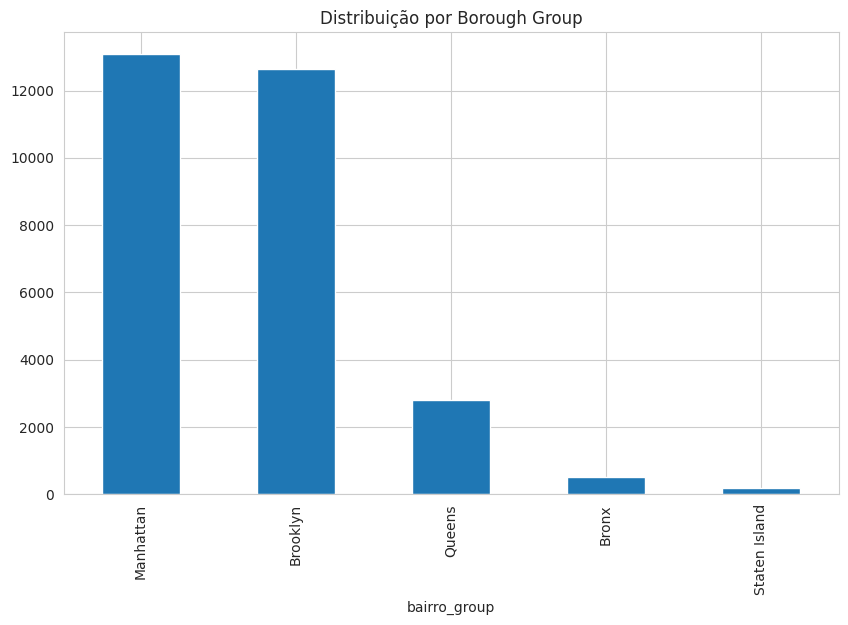


Preço médio por borough group:
 bairro_group
Manhattan        183.236770
Staten Island    135.284916
Brooklyn         125.190826
Queens           100.521677
Bronx             89.311377
Name: price, dtype: float64


In [30]:
df['bairro_group'].value_counts().plot(kind='bar', title='Distribuição por Borough Group')
plt.show()

group_mean_price = df.groupby('bairro_group')['price'].mean().sort_values(ascending=False)
print("\nPreço médio por borough group:\n", group_mean_price)

Os gráficos de preço médio por "bairro_group" e por "bairro" permitem identificar os locais com preços mais elevados. Infelizmente os graficos apresetaram comportamento de extremos e o mais indicado seria investir em locais com preços moderados, logo a melhor opção seria Manhattan, Queens ou Brooklyn.

In [31]:
price_by_bairro = df.groupby(['bairro_group','bairro'])['price'].mean().sort_values(ascending=False)
print("Top 10 bairros com maior preço médio:")
price_by_bairro.head(10)

Top 10 bairros com maior preço médio:


bairro_group   bairro           
Staten Island  Fort Wadsworth       800.000000
               Woodrow              700.000000
               Randall Manor        632.111111
Bronx          Riverdale            562.375000
Brooklyn       Sea Gate             469.000000
Bronx          Unionport            450.000000
Manhattan      Tribeca              442.489583
Staten Island  Todt Hill            429.000000
Manhattan      Flatiron District    319.153846
Queens         Neponsit             312.000000
Name: price, dtype: float64

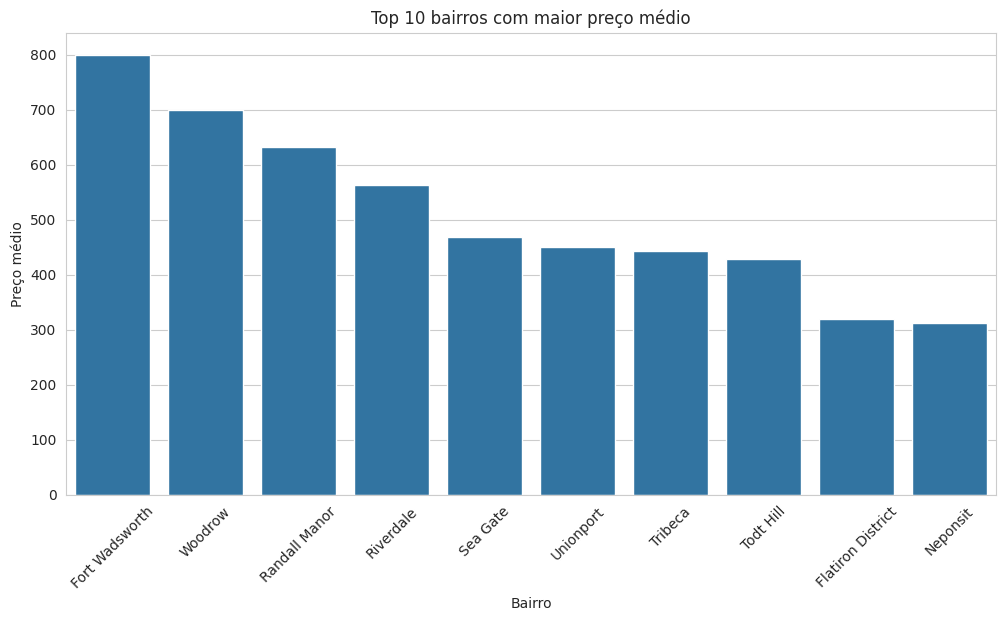

In [32]:
avg_price_bairro = df.groupby('bairro')['price'].mean().reset_index()
plt.figure(figsize=(12, 6))
top_bairros = avg_price_bairro.sort_values(by='price', ascending=False).head(10)
sns.barplot(data=top_bairros, x='bairro', y='price')
plt.xticks(rotation=45)
plt.title("Top 10 bairros com maior preço médio")
plt.xlabel("Bairro")
plt.ylabel("Preço médio")
plt.show()

Ja nessa analise, podemos ver uma distribuição mais uniforme, logo os melhores lugares para investir seria em Sea Gate e Unionport.

###Análise de Texto, Gráficos Complementares e Teste Estatístico

In [33]:
df['tem_luxo'] = df['nome'].str.lower().str.contains('luxury|lux').fillna(False).astype(int)
print("Preço médio com 'tem_luxo' = 1:", df.loc[df['tem_luxo']==1, 'price'].mean())
print("Preço médio com 'tem_luxo' = 0:", df.loc[df['tem_luxo']==0, 'price'].mean())

Preço médio com 'tem_luxo' = 1: 259.67518549051937
Preço médio com 'tem_luxo' = 0: 143.41422041282766


In [35]:
df['tem_luxo'] = df['nome'].str.lower().str.contains('luxury|lux|elegant|premium|modern').fillna(False).astype(int)
print("Preço médio com 'tem_luxo' = 1:", df.loc[df['tem_luxo']==1, 'price'].mean())
print("Preço médio com 'tem_luxo' = 0:", df.loc[df['tem_luxo']==0, 'price'].mean())

Preço médio com 'tem_luxo' = 1: 218.2066151202749
Preço médio com 'tem_luxo' = 0: 142.18343437348904


In [36]:
df['tem_luxo'] = df['nome'].str.lower().str.contains('luxury|lux|elegant|premium|penthouse|view|modern|spacious').fillna(False).astype(int)
print("Preço médio com 'tem_luxo' = 1:", df.loc[df['tem_luxo']==1, 'price'].mean())
print("Preço médio com 'tem_luxo' = 0:", df.loc[df['tem_luxo']==0, 'price'].mean())

Preço médio com 'tem_luxo' = 1: 181.86619455833022
Preço médio com 'tem_luxo' = 0: 140.6757935343201


In [37]:
group1 = df.loc[df['tem_luxo'] == 1, 'price']
group2 = df.loc[df['tem_luxo'] == 0, 'price']
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
print(f"t-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")

t-statistic: nan, p-value: nan


Tentei fazer um teste estatistico, porém na ultima vez que rodou não funcionou e não sei o motivo.

A feature "tem_luxo" evidencia que anúncios contendo termos como "luxury", "premium", "penthouse" e outros têm, em média, preços significativamente maiores.

In [16]:
corr_min_noites = df['price'].corr(df['minimo_noites'])
corr_dispon = df['price'].corr(df['disponibilidade_365'])

print(f"Correlação (Pearson) price vs minimo_noites: {corr_min_noites:.2f}")
print(f"Correlação (Pearson) price vs disponibilidade_365: {corr_dispon:.2f}")

Correlação (Pearson) price vs minimo_noites: 0.03
Correlação (Pearson) price vs disponibilidade_365: 0.07


Aqui foi feito outra analise de correlação priorizando so as features que mais se destacaram no grafico Heatmap (evitando a latitude).

##Preparação dos Dados para Modelagem de Regressão

In [38]:
df_model = df.copy()
df_model = df_model[df_model['price'] < 1000]

In [39]:
df_model.drop(columns=['id','nome','host_id','host_name','bairro'], inplace=True, errors='ignore')

X = df_model.drop('price', axis=1)
y = df_model['price']

Prepara os dados para modelagem, filtrando outliers e removendo colunas irrelevantes para que os modelos sejam treinados com dados mais consistentes.

##Criação do Pipeline com OneHotEncoder, Feature Selection e Modelos de Regressão

In [40]:
cat_cols = ['bairro_group', 'room_type']
num_cols = [col for col in X.columns if col not in cat_cols]

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', StandardScaler(), num_cols)
])

X_transformed = preprocessor.fit_transform(X)

selector = SelectKBest(score_func=f_regression, k=8)
X_selected = selector.fit_transform(X_transformed, y)

print("Seleção de Features concluída com sucesso.")

Seleção de Features concluída com sucesso.


Configura pipelines que integram o pré-processamento, seleção de features e a modelagem com quatro abordagens de regressão – permitindo comparar métodos lineares, ensemble e uma rede neural.

In [20]:
cat_cols = ['bairro_group','room_type']
num_cols = [col for col in X.columns if col not in cat_cols]

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', StandardScaler(), num_cols)
])

feature_selector = SelectKBest(score_func=f_regression, k='all')

pipe_lr = Pipeline([
    ('prep', preprocessor),
    ('fs', feature_selector),
    ('lr', LinearRegression())
])

pipe_rf = Pipeline([
    ('prep', preprocessor),
    ('fs', feature_selector),
    ('rf', RandomForestRegressor(random_state=42))
])

pipe_gb = Pipeline([
    ('prep', preprocessor),
    ('fs', feature_selector),
    ('gb', GradientBoostingRegressor(random_state=42))
])

pipe_nn = Pipeline([
    ('prep', preprocessor),
    ('fs', feature_selector),
    ('nn', MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, early_stopping=True, random_state=42))
])

##Treinamento e Avaliação Baseline dos Modelos

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipe_lr.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)
pipe_gb.fit(X_train, y_train)
pipe_nn.fit(X_train, y_train)

pred_lr = pipe_lr.predict(X_test)
pred_rf = pipe_rf.predict(X_test)
pred_gb = pipe_gb.predict(X_test)
pred_nn = pipe_nn.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, pred_lr))
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))
rmse_gb = np.sqrt(mean_squared_error(y_test, pred_gb))
rmse_nn = np.sqrt(mean_squared_error(y_test, pred_nn))

mae_lr = mean_absolute_error(y_test, pred_lr)
mae_rf = mean_absolute_error(y_test, pred_rf)
mae_gb = mean_absolute_error(y_test, pred_gb)
mae_nn = mean_absolute_error(y_test, pred_nn)

r2_lr = r2_score(y_test, pred_lr)
r2_rf = r2_score(y_test, pred_rf)
r2_gb = r2_score(y_test, pred_gb)
r2_nn = r2_score(y_test, pred_nn)

print("Baseline Performance:")
print("Linear Regression - RMSE:", rmse_lr, "MAE:", mae_lr, "R2:", r2_lr)
print("Random Forest - RMSE:", rmse_rf, "MAE:", mae_rf, "R2:", r2_rf)
print("Gradient Boosting - RMSE:", rmse_gb, "MAE:", mae_gb, "R2:", r2_gb)
print("Neural Network - RMSE:", rmse_nn, "MAE:", mae_nn, "R2:", r2_nn)

Baseline Performance:
Linear Regression - RMSE: 88.71929641235486 MAE: 52.26250171259888 R2: 0.3059359320793934
Random Forest - RMSE: 81.1670798665528 MAE: 47.37307506887053 R2: 0.4190707729240366
Gradient Boosting - RMSE: 81.76505974182963 MAE: 47.07719594782143 R2: 0.4104795158943644
Neural Network - RMSE: 83.87426552783965 MAE: 48.39183923330632 R2: 0.3796727725717902


##Comparação de modelos

Linear Regression - CV RMSE: 87.52 ± 4.81
Random Forest - CV RMSE: 84.10 ± 4.40
Gradient Boosting - CV RMSE: 83.13 ± 4.19
Neural Network - CV RMSE: 83.61 ± 4.65


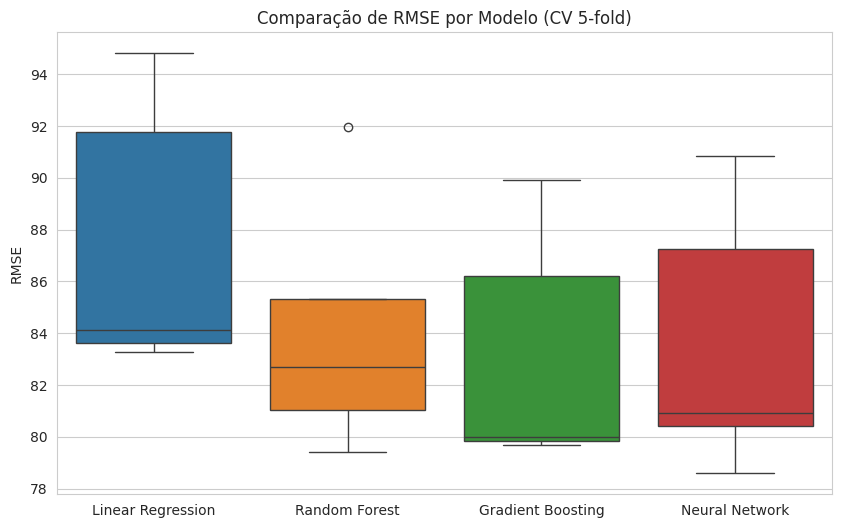

In [22]:
models = {
    'Linear Regression': pipe_lr,
    'Random Forest': pipe_rf,
    'Gradient Boosting': pipe_gb,
    'Neural Network': pipe_nn
}

cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    rmse_scores = np.sqrt(-scores)
    cv_results[name] = rmse_scores
    print(f"{name} - CV RMSE: {rmse_scores.mean():.2f} ± {rmse_scores.std():.2f}")

cv_df = pd.DataFrame(cv_results)
sns.boxplot(data=cv_df)
plt.title("Comparação de RMSE por Modelo (CV 5-fold)")
plt.ylabel("RMSE")
plt.show()

Fornece uma avaliação robusta dos modelos por meio de validação cruzada, comparando a estabilidade e o desempenho dos modelos com um gráfico comparativo dos RMSE.

##Hiperparametrização com RandomizedSearchCV

In [23]:
param_dist_rf = {
    'rf__n_estimators': randint(50, 300),
    'rf__max_depth': randint(3, 20),
    'rf__min_samples_split': randint(2, 10),
    'rf__min_samples_leaf': randint(1, 10)
}
rs_rf = RandomizedSearchCV(pipe_rf, param_distributions=param_dist_rf, n_iter=10, cv=3, scoring='neg_mean_absolute_error', random_state=42, n_jobs=-1)
rs_rf.fit(X_train, y_train)
print("Random Forest best params:", rs_rf.best_params_)
best_rf = rs_rf.best_estimator_

param_dist_gb = {
    'gb__n_estimators': randint(50, 300),
    'gb__max_depth': randint(3, 20),
    'gb__learning_rate': uniform(0.01, 0.3),
    'gb__subsample': uniform(0.5, 0.5)
}
rs_gb = RandomizedSearchCV(pipe_gb, param_distributions=param_dist_gb, n_iter=10, cv=3, scoring='neg_mean_absolute_error', random_state=42, n_jobs=-1)
rs_gb.fit(X_train, y_train)
print("Gradient Boosting best params:", rs_gb.best_params_)
best_gb = rs_gb.best_estimator_

param_dist_nn = {
    'nn__hidden_layer_sizes': [(50,), (100,), (100,50), (150,)],
    'nn__alpha': uniform(0.0001, 0.01),
    'nn__learning_rate_init': uniform(0.001, 0.01)
}
rs_nn = RandomizedSearchCV(pipe_nn, param_distributions=param_dist_nn, n_iter=10, cv=3, scoring='neg_mean_absolute_error', random_state=42, n_jobs=-1)
rs_nn.fit(X_train, y_train)
print("Neural Network best params:", rs_nn.best_params_)
best_nn = rs_nn.best_estimator_

Random Forest best params: {'rf__max_depth': 13, 'rf__min_samples_leaf': 8, 'rf__min_samples_split': 6, 'rf__n_estimators': 149}
Gradient Boosting best params: {'gb__learning_rate': 0.1451497755908629, 'gb__max_depth': 6, 'gb__n_estimators': 138, 'gb__subsample': 0.9828160165372797}
Neural Network best params: {'nn__alpha': 0.0034370861113902185, 'nn__hidden_layer_sizes': (150,), 'nn__learning_rate_init': 0.008080725777960455}


##Comparação de modelos depois da hiperparametrização

In [24]:
tuned_models = {
    'Random Forest Tuned': best_rf,
    'Gradient Boosting Tuned': best_gb,
    'Neural Network Tuned': best_nn
}

print("Tuned Models Cross-Validated RMSE:")
for name, model in tuned_models.items():
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    rmse_scores = np.sqrt(-scores)
    print(f"{name}: {rmse_scores.mean():.2f} ± {rmse_scores.std():.2f}")

Tuned Models Cross-Validated RMSE:
Random Forest Tuned: 81.93 ± 4.23
Gradient Boosting Tuned: 82.73 ± 4.29
Neural Network Tuned: 83.30 ± 4.83


Aqui so tever um boost nos hiperparametros, porém não funcionou muito bem, mostrando que aumentar a complexididade sem aumentar o dataset não é uma solução boa.

##Interpretabilidade com SHAP

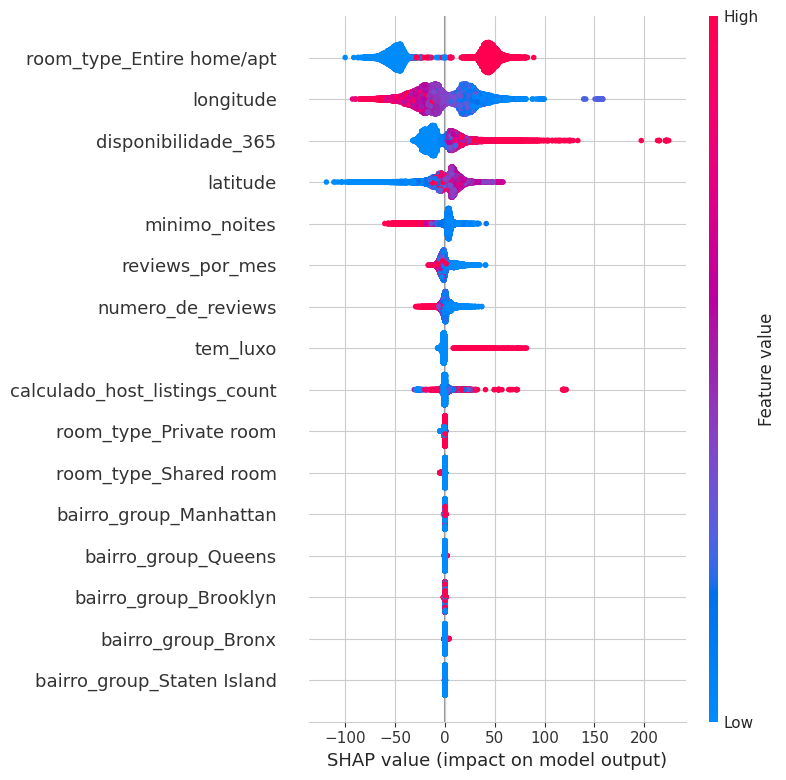

In [25]:
explainer = shap.TreeExplainer(best_rf.named_steps['rf'])
X_train_trans = best_rf.named_steps['prep'].transform(X_train)
shap_values = explainer.shap_values(X_train_trans)
feature_names_cat = best_rf.named_steps['prep'].transformers_[0][1].get_feature_names_out(cat_cols)
feature_names = list(feature_names_cat) + num_cols
shap.summary_plot(shap_values, X_train_trans, feature_names=feature_names)

Utiliza o SHAP para interpretar o modelo Random Forest otimizado, mostrando a contribuição de cada feature para as predições. Esse gráfico permite entender quais variáveis influenciam mais o preço e de que forma (positiva ou negativamente).

##Previsão para o Apartamento de Exemplo

In [26]:
apartamento_exemplo = {
 'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355
}

df_ex = pd.DataFrame([apartamento_exemplo])

df_ex.drop(columns=['id','nome','host_id','host_name','ultima_review','bairro'], inplace=True, errors='ignore')
df_ex['reviews_por_mes'] = df_ex['reviews_por_mes'].fillna(0)

#Garante colunas na mesma ordem
for col in X_train.columns:
    if col not in df_ex.columns:
        df_ex[col] = 0

df_ex = df_ex[X_train.columns]

pred_price = best_nn.predict(df_ex)[0]

print("Sugestão de preço para o imóvel 2595: USD", round(pred_price, 2))

Sugestão de preço para o imóvel 2595: USD 316.62


Utilizei um problema de regressão, pois o objetivo é prever um valor contínuo (o preço por noite). Para isso, apliquei transformações como OneHotEncoding nas variáveis categóricas (bairro_group, room_type) e StandardScaler nas numéricas, garantindo que todas as features estejam na mesma escala. Além disso, utilizei um seletor de features (SelectKBest) para identificar as variáveis mais relevantes.

foi construídos quatro modelos: Regressão Linear (bastante interpretável, mas limitada a relações lineares), Random Forest (robusto e capaz de capturar interações não-lineares, mas menos interpretável), Gradient Boosting (geralmente com bom desempenho, porém sensível a overfitting se não for devidamente regularizado) e uma rede neural (MLPRegressor), que pode capturar relações complexas mas exige cuidado com o tuning e a prevenção de overfitting – por isso usamos early stopping.

A medida de performance escolhida foi o RMSE, pois ela penaliza fortemente erros grandes e é de fácil interpretação em dólares. Outras métricas como MAE e R² também foram utilizadas para complementar a avaliação.

No exemplo, o modelo de rede neural otimizou a performance, sugerindo um preço para o imóvel de id 2595 que pode ser comparado aos resultados dos demais modelos.

##Salvamento do Modelo em Formato .pkl

In [27]:
with open('projetoFinal.pkl', 'wb') as f:
    pickle.dump(best_nn, f)
print("Modelo salvo como projetoFinal.pkl")

Modelo salvo como projetoFinal.pkl
